# Imports

In [36]:
pip install plotly

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objs as go
from scipy.optimize import minimize

# 1D Decision Tree Regressor

In [18]:
def calculate_mse(y):
    if len(y) == 0:
        return 0
    mean_y = np.mean(y)
    mse = np.mean((y - mean_y) ** 2)
    return mse

In [37]:
class DecisionNode:
    def __init__(self, feature_index=None, threshold=None, left=None, right=None, value=None):
        self.feature_index = feature_index
        self.threshold = threshold
        self.left = left
        self.right = right
        self.value = value

class DecisionTreeRegressor:
    def __init__(self, max_depth=None):
        self.max_depth = max_depth
        self.root = None

    def fit(self, X, y):
        self.root = self._grow_tree(X, y, 0)

    def _grow_tree(self, X, y, depth):
        if len(y) == 0:
            return DecisionNode(value=0)

        if depth >= self.max_depth or len(y) == 1:
            return DecisionNode(value=np.mean(y))

        idx, thr = self._best_split(X, y)
        if idx is None:
            return DecisionNode(value=np.mean(y))

        left_idxs, right_idxs = X[:, idx] < thr, X[:, idx] >= thr
        left = self._grow_tree(X[left_idxs], y[left_idxs], depth + 1)
        right = self._grow_tree(X[right_idxs], y[right_idxs], depth + 1)
        return DecisionNode(idx, thr, left, right)

    def _best_split(self, X, y):

        def threshold_loss(threshold, X, y):
            left_idxs = X[:, idx] < threshold
            right_idxs = X[:, idx] >= threshold

            left_data = y[left_idxs]
            right_data = y[right_idxs]

            left_mse = calculate_mse(left_data)
            right_mse = calculate_mse(right_data)

            mse_reduction = left_mse + right_mse

            return mse_reduction

        m, n = X.shape
        best_mse_reduction = float('inf')
        best_threshold = None
        best_left_idxs = None
        best_right_idxs = None
        best_idx = None

        for idx in range(n):
            initial_threshold = np.mean(X[:, idx])
            result = minimize(threshold_loss, initial_threshold, args=(X, y), method='L-BFGS-B')
            threshold = result.x
            mse_reduction = threshold_loss(threshold, X, y)

            if mse_reduction < best_mse_reduction:
                best_mse_reduction = mse_reduction
                best_threshold = threshold
                best_idx = idx
        return best_idx, best_threshold


    def predict(self, X):
        return np.array([self._predict(inputs) for inputs in X])

    def _predict(self, inputs):
        node = self.root
        while node.left:
            if inputs[node.feature_index] < node.threshold:
                node = node.left
            else:
                node = node.right
        return node.value

# Cosinus attempt

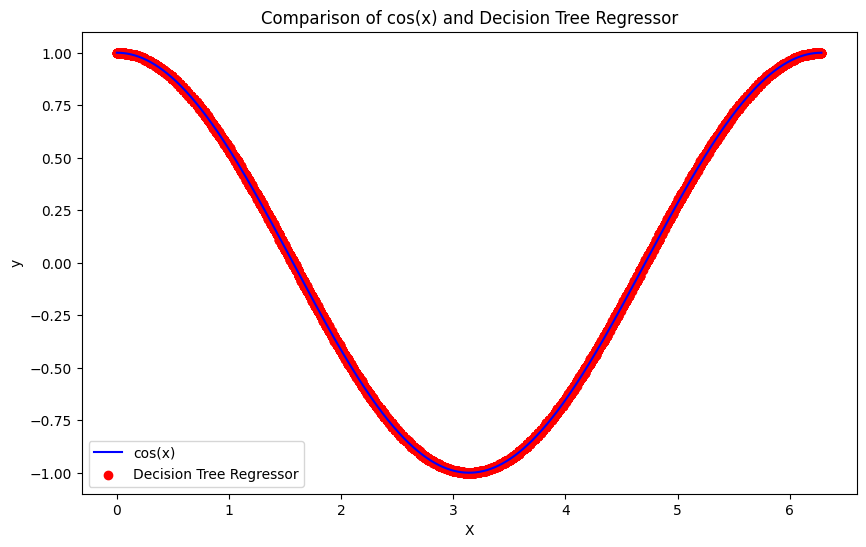

In [27]:
# Generate dataset
X = np.linspace(0, 2 * np.pi, 10000).reshape(-1, 1)  # X values
y = np.cos(X).ravel()  # y values (cos(x))

# Create and train the decision tree regressor from scratch
# regressor = DecisionTreeRegressor(max_depth=12)
regressor = DecisionTreeRegressor(max_depth=8)
regressor.fit(X, y)

# Predict on the generated dataset
y_pred = regressor.predict(X)

# Plotting both the cos(x) and the decision tree regressor predictions
plt.figure(figsize=(10, 6))
plt.plot(X, y, label='cos(x)', color='blue')
plt.scatter(X, y_pred, label='Decision Tree Regressor', color='red')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Comparison of cos(x) and Decision Tree Regressor')
plt.legend()
plt.show()

#Multi Dimensional Decision Tree Regressor

In [8]:
class MultiDimensionalDecisionTreeRegressor:
    def __init__(self, max_depth=None):
        self.max_depth = max_depth
        self.trees = []

    def fit(self, X, y):
        for target_dim in range(y.shape[1]):
            tree = DecisionTreeRegressor(max_depth=self.max_depth)
            tree.fit(X, y[:, target_dim])
            self.trees.append(tree)

    def predict(self, X):
        predictions = []
        for tree in self.trees:
            predictions.append(tree.predict(X))
        return np.array(predictions).T

#Circle dataset creation

In [9]:
radius = 1
center = (0, 0)

theta = np.linspace(0, 2*np.pi, 100)
x_circle = center[0] + radius * np.cos(theta)
y_circle = center[1] + radius * np.sin(theta)

circle_points = np.vstack((x_circle, y_circle)).T

# Circle attempt

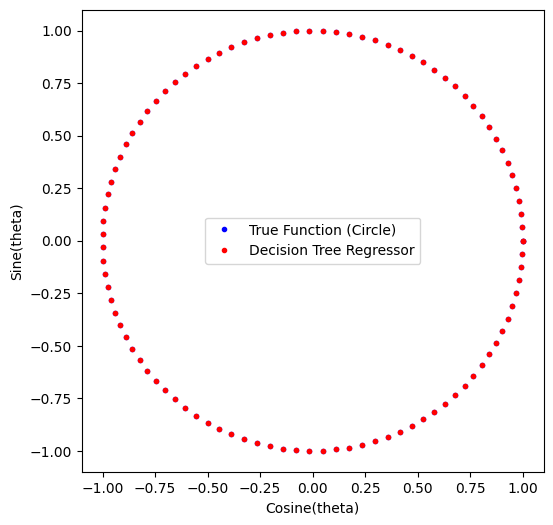

In [29]:
X = np.arange(1, 101).reshape(-1, 1)
y = circle_points

# regressor_circle = DecisionTreeRegressor(max_depth=8)
regressor_circle = MultiDimensionalDecisionTreeRegressor(max_depth=8)
regressor_circle.fit(X, y)

y_pred = regressor_circle.predict(X)

plt.figure(figsize=(6, 6))
plt.plot(y[:, 0], y[:, 1], '.', label='True Function (Circle)', color='blue')
plt.plot(y_pred[:, 0], y_pred[:, 1], '.', label='Decision Tree Regressor', color='red')
plt.xlabel('Cosine(theta)')
plt.ylabel('Sine(theta)')
plt.legend()
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

# Attempt on multidimensional input

In [40]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor

# Load California Housing dataset
california_housing = fetch_california_housing()
X = california_housing.data
y = california_housing.target

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define DecisionTreeRegressor
dt_regressor_sklearn = DecisionTreeRegressor(max_depth=4)

# Fit the model
dt_regressor_sklearn.fit(X_train, y_train)

# Predict on the test set
y_pred = dt_regressor_sklearn.predict(X_test)

# Calculate mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")


Mean Squared Error: 0.58


# Sphere dataset creation

In [38]:
radius = 1
num_points = 30

theta = np.linspace(0, np.pi, num_points)
phi = np.linspace(0, 2 * np.pi, num_points)

theta, phi = np.meshgrid(theta, phi)

x_sphere = radius * np.sin(theta) * np.cos(phi)
y_sphere = radius * np.sin(theta) * np.sin(phi)
z_sphere = radius * np.cos(theta)

sphere_points = np.vstack((x_sphere.flatten(), y_sphere.flatten(), z_sphere.flatten())).T

#Sphere attempt

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [39]:
X = np.arange(1, 901).reshape(-1, 1)
y = sphere_points


regressor_sphere = MultiDimensionalDecisionTreeRegressor(max_depth=10)
# regressor_sphere = DecisionTreeRegressor(max_depth=10)
regressor_sphere.fit(X, y)

y_pred = regressor_sphere.predict(X)

fig = go.Figure()
fig.add_trace(go.Scatter3d(x=y_pred[:, 0], y=y_pred[:, 1], z=y_pred[:, 2], mode='markers', name='Decision Tree Regressor', marker=dict(color='red', size=4)))
fig.add_trace(go.Surface(x=x_sphere, y=y_sphere, z=z_sphere, name='Sphere', colorscale='blues', opacity=0.6))
fig.update_layout(scene=dict(xaxis_title='X', yaxis_title='Y', zaxis_title='Z'), title='Sphere')
fig.show()

(900, 1)
(900, 3)
